<a href="https://www.kaggle.com/code/klndevinda/weather-prediction-sl?scriptVersionId=138081653" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Setup plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

/kaggle/input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv


In [11]:
#Extracting the medical insurance data
weather = pd.read_csv('../input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv')
weather.head(5)
cities = pd.DataFrame({'Cities' : weather.city.unique()})
latitudes = []
longitudes = []
# cities.head()
for i in range(cities['Cities'].size):
    lat = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes
cities.head()

,Cities,latitude,longitude
0,Colombo,7.000000,79.899994
1,Mount Lavinia,6.900002,79.899994
2,Kesbewa,6.800003,79.899994
3,Moratuwa,6.800003,79.899994
4,Maharagama,6.800003,79.899994


# Weather Data Collected Cities

In [12]:
# Create a map
m_1 = folium.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

    
for idx, row in cities.iterrows():
    folium.Circle(location = [row['latitude'], row['longitude']], 
                  radius = 2000,
                 ).add_to(m_1)
# Display the map
m_1

# Visualizing Data for Kandy

In [13]:
cities = weather.city.unique()
#collecting data for kandy
weather_sl_kandy = weather[weather['city'] == 'Kandy']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_kandy.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_kandy = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_kandy.set_index('time', drop = True, inplace = True)
weather_kandy.head()

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city
time,,,,,,,,,,,,
2010-01-01,2,22.0,23.8,18.09,0.0,0.0,0.0,15.3,38.9,57,3.43,Kandy
2010-01-02,2,22.2,24.8,15.47,0.0,0.0,0.0,13.3,33.1,46,2.95,Kandy
2010-01-03,51,22.1,25.0,14.99,0.1,0.1,1.0,10.7,28.1,40,2.84,Kandy
2010-01-04,51,21.9,24.3,16.55,0.6,0.6,2.0,10.4,29.2,23,3.16,Kandy
2010-01-05,1,20.8,22.6,22.68,0.0,0.0,0.0,9.7,27.0,28,4.18,Kandy


Text(0.5, 1.0, 'Monthly Rainfall from 2010 - 2020 in Sri Lanka')

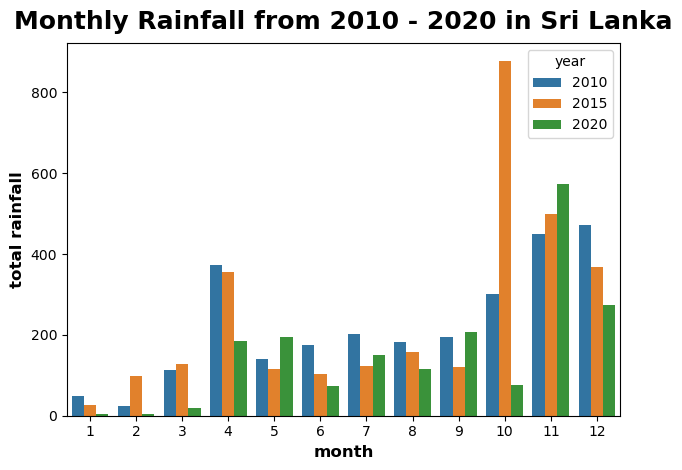

In [14]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_kandy.groupby([weather_kandy.index.year, weather_kandy.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2010, 2015, 2020]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall from 2010 - 2020 in Sri Lanka')

**2015 flooding and extreme weather conditions due to higher than usual rainfall during October

/tmp/ipykernel_33/1605486123.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = avg_temp.pivot("year", "month", "temperature_2m_mean")


<Axes: xlabel='month', ylabel='year'>

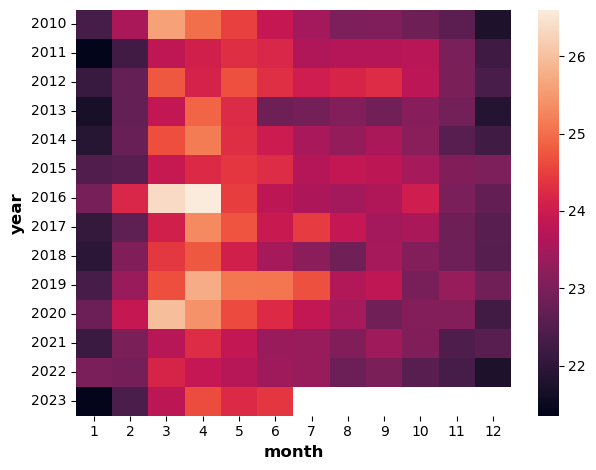

In [15]:
avg_temp = weather_kandy.groupby([weather_kandy.index.year, weather_kandy.index.month]).aggregate(
{'apparent_temperature_mean' : 'mean', 'temperature_2m_mean' : 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot("year", "month", "temperature_2m_mean")
sns.heatmap(glue)

**El Nino and La Nina 2015-2016, caused significant rise in average temperature in 2016.

**Understanding Weathercodes**

Text(0, 0.5, 'Average Temperature')

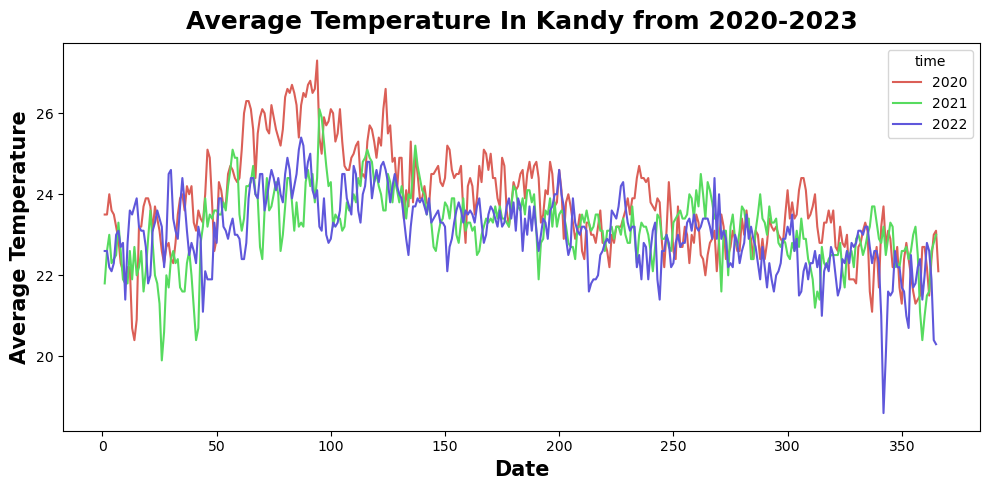

In [16]:
T = weather_kandy.loc['2020-01-01':'2022-12-31']['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('Average Temperature In Kandy from 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Temperature', fontsize=15)

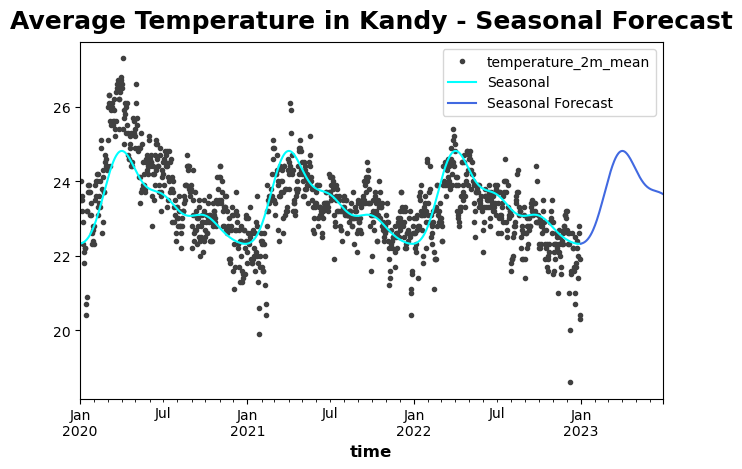

In [17]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2022-12-31", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Kandy - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

In [18]:
codes_list = weather.weathercode.unique()
codes_list

array([ 2, 51,  1,  3, 53, 61, 63,  0, 65, 55])

| Weather Code      | Description |
| ----------- | ---------- |
| 0   | Cloud development not observed or observable|
| 1   | Clouds dissolving or becoming less developed |
| 2   | State of sky on the whole unchanged        |
| 3   | Clouds generally forming or developing      |
| 51  | Drizzle, not freezing, continuous ( slight at time of observation)|
| 53  | Drizzle, not freezing, continuous ( moderate at time of observation) |
| 55  | Drizzle, not freezing, continuous ( heavy (dense) at time of observation)|
| 61  | Rain, not freezing, continuous ( slight at time of observation)|
| 63  | Rain, not freezing, continuous ( moderate at time of observation)|
| 65  | Rain, not freezing, continuous ( heavy at time of observation)|

In this classification problem I will be using several parameters, and dropping several that are reduundant or not useful for predictions. Although this model is built for forecasting weather in Kandy, I will use features from several other cities as there may be a correlation with other city parameters. **Since this is a forecast, I'm going to use lagged features.